In [ ]:
import os
import cv2
import numpy as np
import zipfile
import matplotlib.pyplot as plt

In [2]:
def unzip_folder(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"Extracted files to: {extract_to}")

In [3]:
unzip_folder("archive.zip","/content/")

Extracted files to: /content/


In [4]:
import shutil

normal_dir = '/content/Data/NORMAL'
hemorrhagic_dir = '/content/Data/Hemorrhagic'

# Move images from subfolders in NORMAL
for root, dirs, files in os.walk(normal_dir):
    for file in files:
        file_path = os.path.join(root, file)
        destination_path = os.path.join(normal_dir, file)
        if file_path != destination_path and not os.path.exists(destination_path):
            shutil.move(file_path, normal_dir)

# Move images from subfolders in Hemorrhagic
for root, dirs, files in os.walk(hemorrhagic_dir):
    for file in files:
        file_path = os.path.join(root, file)
        destination_path = os.path.join(hemorrhagic_dir, file)
        if file_path != destination_path and not os.path.exists(destination_path):
            shutil.move(file_path, hemorrhagic_dir)

for root, dirs, files in os.walk(normal_dir):
    for dir in dirs:
        shutil.rmtree(os.path.join(root, dir))

for root, dirs, files in os.walk(hemorrhagic_dir):
    for dir in dirs:
        shutil.rmtree(os.path.join(root, dir))

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range = 0.2,
    shear_range = 0.2,
    horizontal_flip=True,
    validation_split=0.2,
    fill_mode = 'nearest'
)

# Training generator
train_generator = train_datagen.flow_from_directory(
    '/content/Data',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

# Validation generator
validation_generator = train_datagen.flow_from_directory(
    '/content/Data',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 5436 images belonging to 2 classes.
Found 1358 images belonging to 2 classes.


Labels:  [0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 0. 0. 1. 1. 1. 0.]


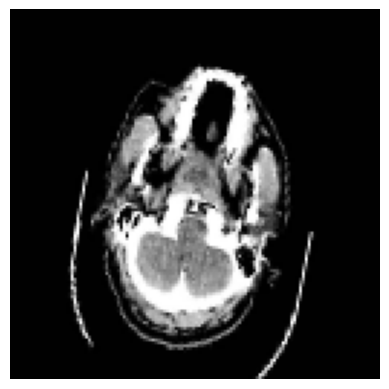

In [6]:
images, labels = next(validation_generator)
image = images[0]
print("Labels: ", labels)

plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import RNN, LSTM, Dense, Dropout, Reshape
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings("ignore")

model = Sequential([
    # Reshape the image to have timesteps = 128 and features = 128*3 (channels)
    Reshape((128, 128 * 3), input_shape=(128, 128, 3)),
    
    # RNN layer
    LSTM(128, activation='relu', return_sequences=True),
    Dropout(0.3),
    
    # RNN layer
    LSTM(64, activation='relu'),
    Dropout(0.3),
    
    # Fully connected Dense layers
    Dense(64, activation='relu'),
    Dropout(0.5),
    
    # Output layer for binary classification
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate = 1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50
)

Epoch 1/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 32s 171ms/step - accuracy: 0.5402 - loss: 0.7057 - val_accuracy: 0.6046 - val_loss: 0.6811
Epoch 2/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 29s 164ms/step - accuracy: 0.5797 - loss: 0.6860 - val_accuracy: 0.6060 - val_loss: 0.6777
Epoch 3/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 29s 165ms/step - accuracy: 0.5912 - loss: 0.6840 - val_accuracy: 0.6060 - val_loss: 0.6745
Epoch 4/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 29s 167ms/step - accuracy: 0.6027 - loss: 0.6766 - val_accuracy: 0.6053 - val_loss: 0.6722
Epoch 5/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 29s 167ms/step - accuracy: 0.6051 - loss: 0.6739 - val_accuracy: 0.6046 - val_loss: 0.6732
Epoch 6/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 29s 167ms/step - accuracy: 0.6041 - loss: 0.6752 - val_accuracy: 0.6046 - val_loss: 0.6723
Epoch 7/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 29s 166ms/step - accuracy: 0.6073 - loss: 0.6730 - val_accuracy: 0.6053 - val_loss: 0.6709
Epoch 8/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 29s 167ms/step - accuracy: 0.5955 - loss: 0